# Mini Project 1, team Kool Kids

# 1. Dataset Preparation & Analysis

### 1.1 Load Dataset

In [1]:
import gzip
import json
import pandas as pd

labels = 'Post', 'Emotion', 'Sentiment'
file = gzip.open('goemotions.json.gz', 'rb')
entries = json.load(file)
dataset = pd.DataFrame(entries, columns=labels)

### 1.3 Extract posts and labels in a plot

##### data extraction

In [2]:
posts = dataset[labels[0]]
emotions = dataset[labels[1]]
sentiments = dataset[labels[2]]
emotions_distribution = dataset.pivot_table(columns=labels[1], aggfunc='size')
sentiments_distribution = dataset.pivot_table(columns=labels[2], aggfunc='size')


##### plotting the distributions

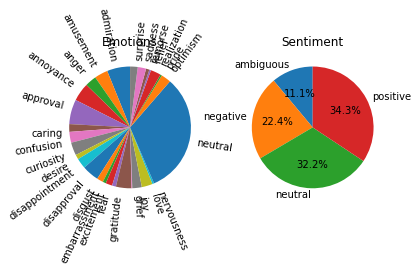

In [3]:
import matplotlib.pyplot as plt

fig, (emo, sent) = plt.subplots(1, 2)

# Emotions Pie Chart
emo.set_title("Emotions")
emo.pie(emotions_distribution.values, labels=emotions_distribution.keys(),
            shadow=False, startangle=90, rotatelabels=True)

# Sentiment Pie Chart
sent.set_title("Sentiment")
sent.pie(
    sentiments_distribution.values, labels=sentiments_distribution.keys(), 
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

# 2. Words as Features

### 2.1 Displaying dataset tokens

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

post_vectorizer = CountVectorizer()
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

emotions_label_encoder = LabelEncoder()
Y = emotions_label_encoder.fit_transform(emotions)

sentiments_label_encoder = LabelEncoder()
Z = sentiments_label_encoder.fit_transform(sentiments)

There are 30449 unique tokens


### 2.2 Splitting the dataset

In [72]:
from sklearn.model_selection.tests import test_split

post_train, post_test, emotion_train, emotion_test, sentiment_train, sentiment_test = test_split.train_test_split(
    X,
    Y,
    Z,
    test_size=0.20)

### 2.3 Classifier Training / Testing

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#### 2.3.1 Base-MNB

In [7]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

MultinomialNB()

#### 2.3.2 Base-DT

#### 2.3.3 Base-MLP

In [8]:
base_mlp_emotion = MLPClassifier(max_iter=1)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=1)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=1)
MLPClassifier(max_iter=1)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


#### 2.3.4 Top-MNB

In [11]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_test, emotion_test)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_test, sentiment_test)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.25, 0.5, 0.75]})

#### 2.3.5 Top-DT

#### 2.3.6 Top-MLP

In [ ]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

### 2.4 Performance

#### Classification report

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

Base MNB
Emotion
Confusion Matrix 

[[ 901   13    0    8   43    2    2    3    1    0    3    1    1    0
     0   53    0   13   41    0  934   10    0    2    0    0    0    6]
 [  38  376    3   18    8    0    1    2    0    1    4    0    0    3
     0    3    0   10    3    0  728    4    0    2    0    1    1    3]
 [  14   10  130   73    5    1    0    4    0    8   23   12    0    0
     1    6    0    1    2    0  801    2    0    2    0    0    3    0]
 [  30   20   33  133   39    3    9   11    0   10   24    3    0    2
     0   17    0    4    4    0 1314    3    0    4    0    0   11    4]
 [ 120   17    5   30  213   12   12    9    0    3   28    0    0    2
     2   20    0    6   11    0 1782   10    0    7    0    0    6    2]
 [  13    1    1    3   14   43    1    2    0    1    5    0    0    0
     0   20    0    4    3    0  540   19    0    0    0    2    2    1]
 [   7   10    2    5   20    1   56   33    1    3   15    0    0    0
     0    6    0    1 

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  388     5     0     0     0     0     0     0     0     0     0     0
      0     0     0    16     0     0    25     0  1602     1     0     0
      0     0     0     0]
 [   12   162     0     0     0     0     0     0     0     0     0     0
      0     0     0     4     0     0     4     0  1027     0     0     0
      0     0     0     0]
 [    4     2     1     1     0     0     0     0     0     0     0     0
      0     0     0     4     0     0     1     0  1084     1     0     0
      0     0     0     0]
 [   10     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     6     0     0     2     0  1657     0     0     0
      0     0     0     0]
 [   38     9     0     0     6     0     0     0     0     0     0     0
      0     0     0     8     0     0     6     0  2230     0     0     0
      0     0     0     0]
 [   11     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    11     0     0     2     0  

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   ambiguous       0.00      0.00      0.00      3791
    negative       0.61      0.00      0.01      7739
     neutral       0.41      0.07      0.12     11053
    positive       0.35      0.97      0.52     11781

    accuracy                           0.36     34364
   macro avg       0.34      0.26      0.16     34364
weighted avg       0.39      0.36      0.22     34364

Top MNB
Emotion
Confusion Matrix 



NameError: name 'top_mnb_emotion' is not defined

### 2.5 Exploration (Removing Stop Words)

In [ ]:
post_vectorizer = CountVectorizer(stop_words='english')
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

#### 2.5.1 Base-MNB

In [ ]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

#### 2.5.2 Base-DT

#### 2.5.3 Base-MLP

In [ ]:
base_mlp_emotion = MLPClassifier(max_iter=1)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=1)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


#### 2.5.4 Top-MNB

In [ ]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_test, emotion_test)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_test, sentiment_test)


#### 2.5.5 Top-DT

#### 2.5.6 Top-MLP

In [ ]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

#### Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

## 3 Embedding as Features

### 3.1 Word2Vec import

In [9]:
from gensim.downloader import load


model = load('word2vec-google-news-300')

### 3.2 Tokenizer

In [14]:
from nltk.tokenize import word_tokenize

postsVec = dataset[labels[0]].apply(word_tokenize)
posts_vec_train, posts_vec_test = test_split.train_test_split(postsVec, test_size=0.20)

words_train = 0

for i, post in enumerate(posts_vec_train):
    for word in post:
        words_train = words_train + 1


In [15]:
print('There are', len(posts_vec_train), 'sentences')
print('There are', words_train, 'tokens')
print('Training only')

There are 137456 sentences
There are 2113634 tokens
Training only


### 3.3 Post Embedding

In [29]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

In [50]:
post_embedding_train = np.zeros((len(posts_vec_train), model.vector_size))
for i, post in enumerate(posts_vec_train):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            post_vec = np.add(post_vec, model[word])            
    if words == 0:
        words = 1
    post_embedding_train[i] = np.divide(post_vec, words)
    
post_embedding_test = np.zeros((len(posts_vec_test), model.vector_size))
for i, post in enumerate(posts_vec_test):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            post_vec = np.add(post_vec, model[word])
    if words == 0:
        words = 1    
    post_embedding_test[i] = np.divide(post_vec, words)

In [52]:
print(post_embedding_train)

[[ 0.03469016 -0.00882097  0.10479181 ... -0.08990479  0.0501598
  -0.02492454]
 [-0.0364719   0.07302517  0.05056085 ... -0.04314507  0.05924479
  -0.07115343]
 [ 0.04743245 -0.01230818  0.08504028 ... -0.00394389  0.06474609
   0.0161377 ]
 ...
 [ 0.00330734  0.03811646  0.06364441 ... -0.0110321   0.02285767
  -0.06971741]
 [ 0.08946228  0.00646973  0.08447266 ... -0.0266449   0.06843262
  -0.05689697]
 [ 0.09799805  0.04296875  0.02064209 ...  0.03654785  0.06652222
   0.00532227]]


### 3.4 Hit Rate

In [53]:
hits = 0
total_words = 0
for i, post in enumerate(posts_vec_train):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Training hit rate', hits / total_words)

hits = 0
total_words = 0
for i, post in enumerate(posts_vec_test):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Testing hit rate', hits / total_words)

Training hit rate 0.7745579414411388
Testing hit rate 0.7743001812697968


### 3.5 Base-MLP

In [ ]:
w2v_base_mlp = MLPClassifier()
w2v_base_mlp.fit(post_embedding_train, emotion_train)